<a href="https://colab.research.google.com/github/ola-sumbo/Hamoye-and-ML-with-Ude/blob/master/ARMA_and_Unit_root.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [91]:
df = pd.read_csv( "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv" )
df.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [92]:
df["Month"] = pd.to_datetime(df["Month"]) #convert column to datatime 
df.head()

,Month,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [93]:
df["Month"] = pd.to_datetime(df["Month"]) #convert column to datatime 
df.head()

,Month,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


Text(0, 0.5, 'Passengers')

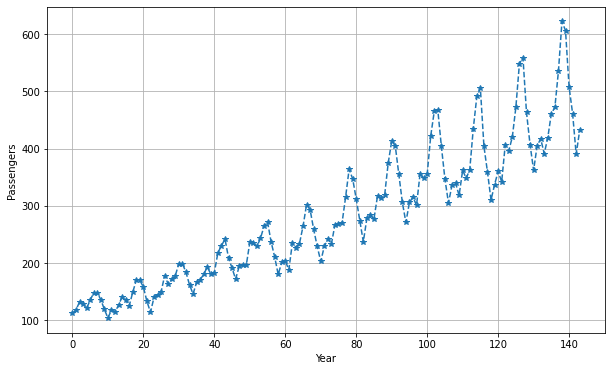

In [94]:
plt.figure(figsize=(10,6))
plt.plot(df.index, df.Passengers, '--', marker='*')
plt.grid()
plt.xlabel('Year')
plt.ylabel('Passengers')

In [95]:
#check for missing values 
df.isnull().values.any() ##There are no missing values in our dataset however, in bid to explain how we handle

False

**We will copy our dataset and delete some missing values in the bid to explain how to fill missing values**

In [96]:
df_copy = df.copy()

In [97]:
rows = df_copy.sample(frac=0.1, random_state=0)
rows['Passengers'] = np.nan
df_copy.loc[rows.index, 'Passengers'] = rows['Passengers'] # assigning the random sample numbers picked to their index location to be the values in the passengers column to fill np.nan
df_copy.isnull().sum() #There are now 14 missing values in the dataset

Month          0
Passengers    14
dtype: int64

Filling missing data by imputation - Forward fill

In [98]:
df_copy_ffill = df_copy.fillna(method='ffill')
df_copy_ffill.isnull().sum()

Month         0
Passengers    0
dtype: int64

In [99]:
#Filling missing data by imputation - Backward fill
df_copy_bfill = df_copy.fillna(method='bfill')
df_copy_bfill.isnull().sum()

Month         0
Passengers    0
dtype: int64

**Filling missing values by interpolation**

In [100]:
df_copy_LIF = df_copy.interpolate(method='linear', limit_direction='forward')
df_copy_LIF.isnull().sum()

Month         0
Passengers    0
dtype: int64

In [101]:
df_copy_LIB = df_copy.interpolate(method='linear', limit_direction='backward')
df_copy_LIB.isnull().sum()

Month         0
Passengers    0
dtype: int64

**Downsampling and Upsampling**

In [102]:
# Downsampling to quartely data 
df_quartely = df.resample('3M', on='Month').mean()

In [103]:
# Upsampling to daily data point 
df_daily = df.resample('D', on='Month').mean()

Text(0, 0.5, 'Passengers')

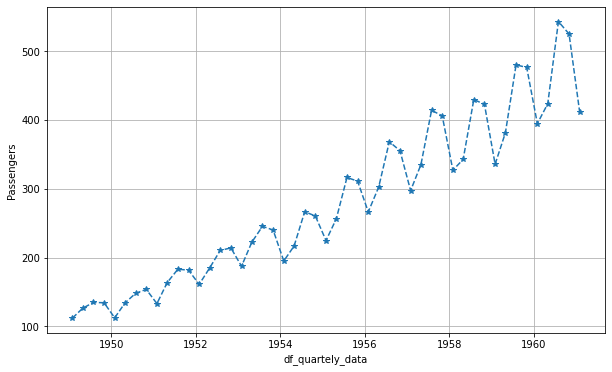

In [104]:
plt.figure(figsize=( 10 , 6 ))
plt.plot(df_quartely.index, df_quartely.Passengers, '--' , marker= '*' , )
plt.grid()
plt.xlabel( 'df_quartely_data' )
plt.ylabel( 'Passengers' )

Text(0, 0.5, 'Passengers')

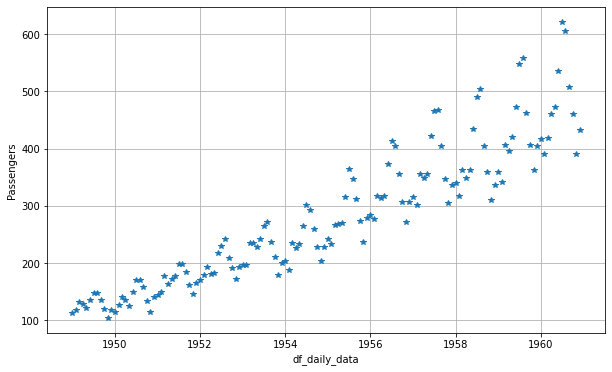

In [105]:
plt.figure(figsize=( 10 , 6 ))
plt.plot(df_daily.index, df_daily.Passengers, '--' , marker= '*' , )
plt.grid()
plt.xlabel( 'df_daily_data' )
plt.ylabel( 'Passengers' )

Text(0, 0.5, 'Passengers')

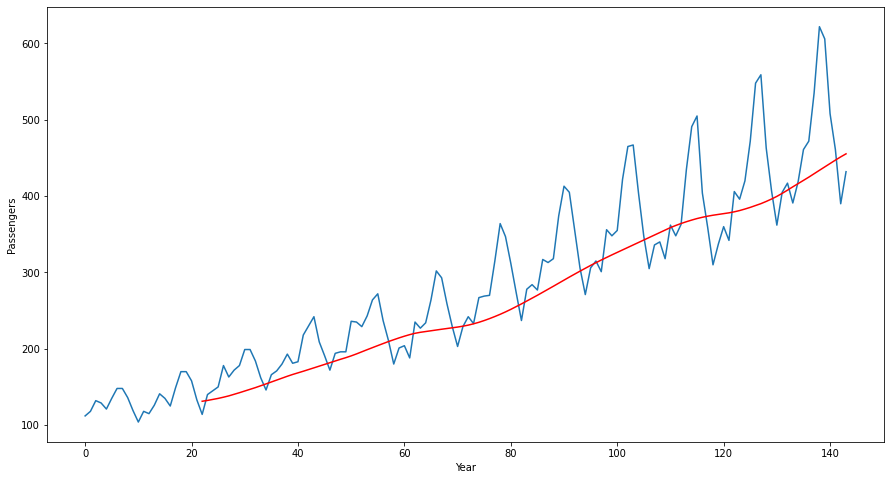

In [106]:
df_MA = df.copy()
MA = df_MA['Passengers'].rolling(12).mean()
plt.plot(df.index, df.Passengers, '-')
plt.plot(MA.rolling(12).mean(), color='red')
plt.xlabel( 'Year' )
plt.ylabel( 'Passengers' )

**Time Series Specific Explanatory Models**

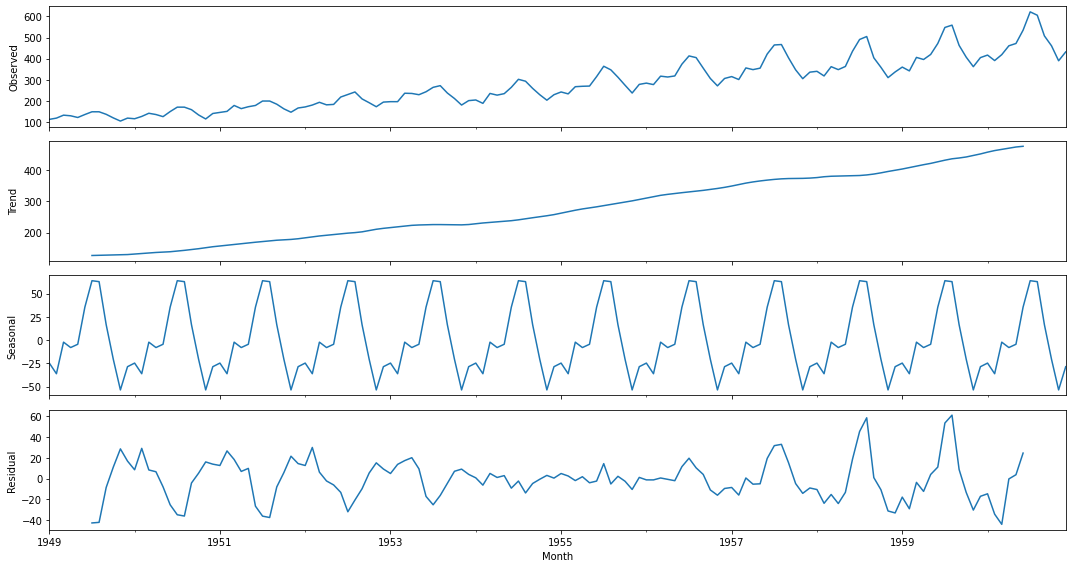

In [107]:
import statsmodels.api as sm
from pylab import rcParams
from statsmodels.tsa.seasonal import seasonal_decompose

rcParams['figure.figsize'] = 15, 8
df = df.set_index('Month')
decompose_series = sm.tsa.seasonal_decompose(df['Passengers'], model='additive')
decompose_series.plot()
plt.show()

**The decomposed time series show an obvious increasing trend and seasonality variations. Recall that we have initially plotted the moving average on the last 12 months which showed that it varies with time. This suggests that the data is not stationary. We will now perform an ADF test to confirm this speculation**

In [108]:
from statsmodels.tsa.stattools import adfuller 
adf_result = adfuller(df['Passengers'])
print(f'ADF Statistic: {adf_result[0]}')
print(f'p_value: {adf_result[1]}')
print(f'No. of lags used: {adf_result[2]}')
print(f'No. of observations used: {adf_result[3]}')
print(f'Critical_values:')
for k, v in adf_result[4].items():
  print(f'  {k} : {v}')

ADF Statistic: 0.815368879206047
p_value: 0.991880243437641
No. of lags used: 13
No. of observations used: 130
Critical_values:
  1% : -3.4816817173418295
  5% : -2.8840418343195267
  10% : -2.578770059171598


**From the results obtained, the p-value is greater than the critical value at a 5% significance level and, the ADF statistic is greater that any of the critical values obtain. #This confirms that the series is indeed non-stationary.**

Text(0, 0.5, 'Passengers')

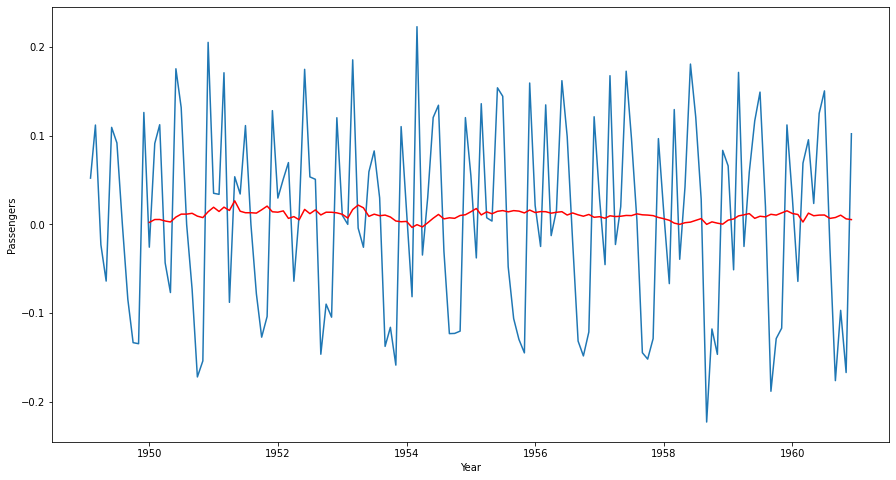

In [109]:
# Convert time series to stationary by removing trend and seasonality through log transformation and differencing
df_log = np.log(df)
df_diff = df_log.diff(periods=1)
plt.plot(df_diff.index, df_diff.Passengers, '-')
plt.plot(df_diff.rolling(12).mean(), color='red')
plt.xlabel( 'Year' )
plt.ylabel( 'Passengers' )

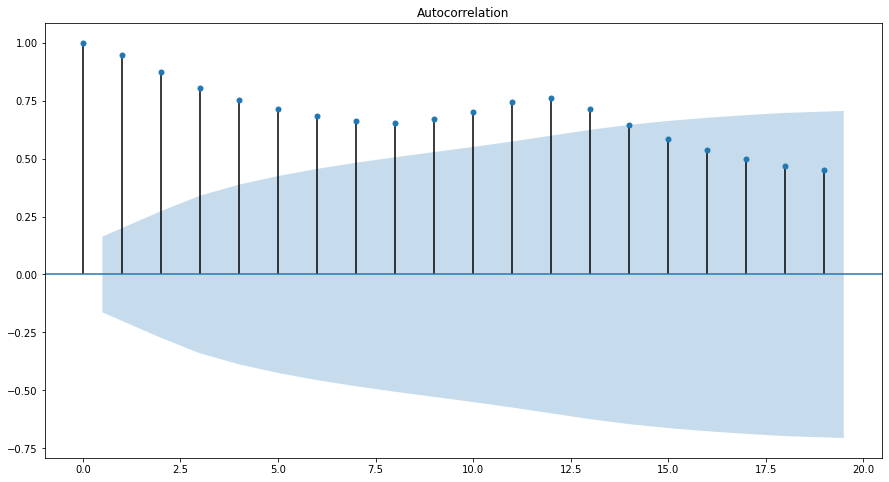

In [110]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#ACF
plot_acf(df, lags = range( 0 , 20 ))
plt.show() 

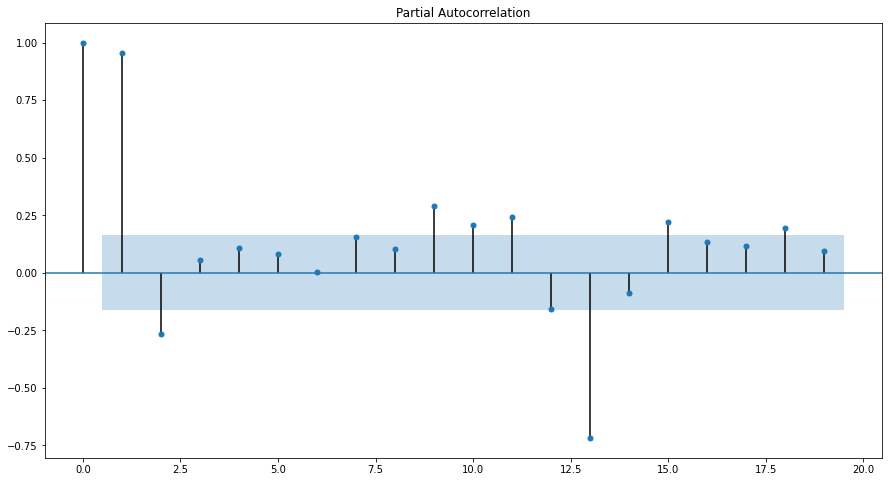

In [111]:
#PACF
plot_pacf(df, lags = range( 0 , 20 ))
plt.show() 

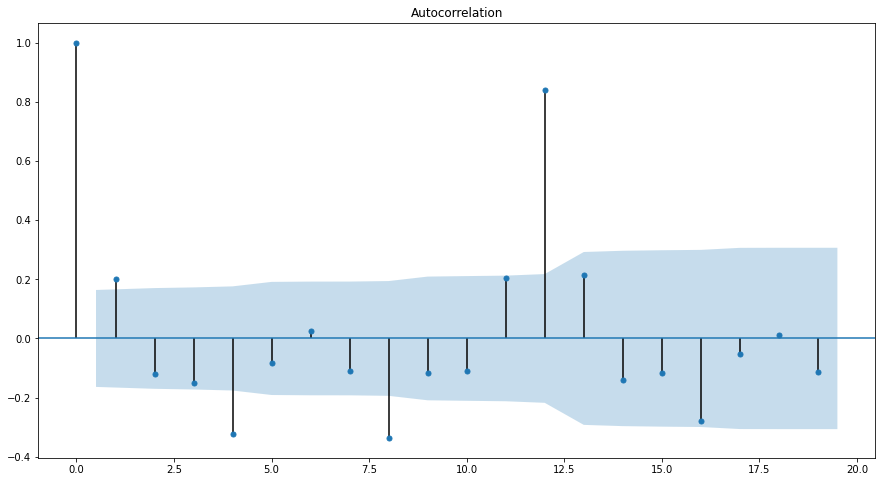

In [112]:
#df_log = np.log(df)
#df_diff = df_log.diff(periods= 1 )
df_diff = np.log(df).diff().dropna()
#ACF
plot_acf(df_diff, lags = range(0, 20))
plt.show() 

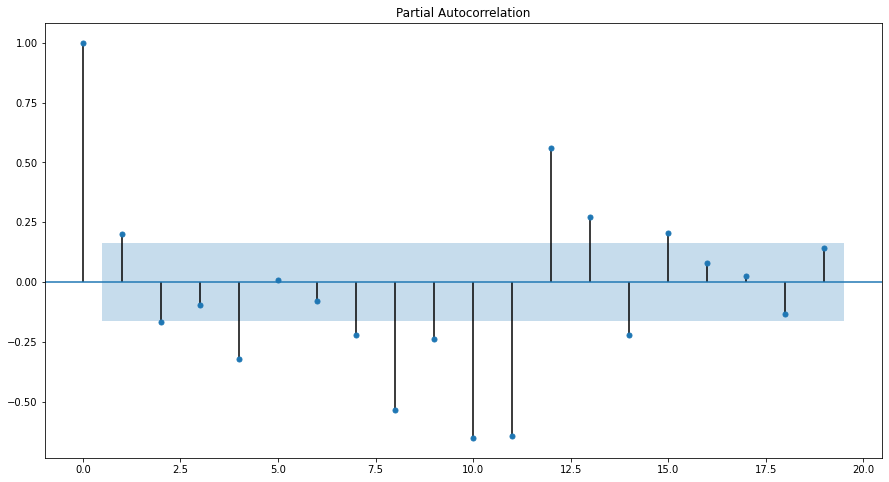

In [113]:
#PACF
plot_pacf(df_diff, lags = range(0,20))
plt.show() 

**The shaded regions in the plots are the confidence intervals. The lags where the PACF and ACF charts cross this region are the values for p and q respectively. In both plots, #p=q=1.The shaded regions in the plots are the confidence intervals. The lags where the PACF and ACF charts cross this region are the values for p and q respectively.In the ACF plot, there is one lag that crosses the significance level hence, q=1. Similarly in the PACF plot, p=2 AR, MA and ARIMA **

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


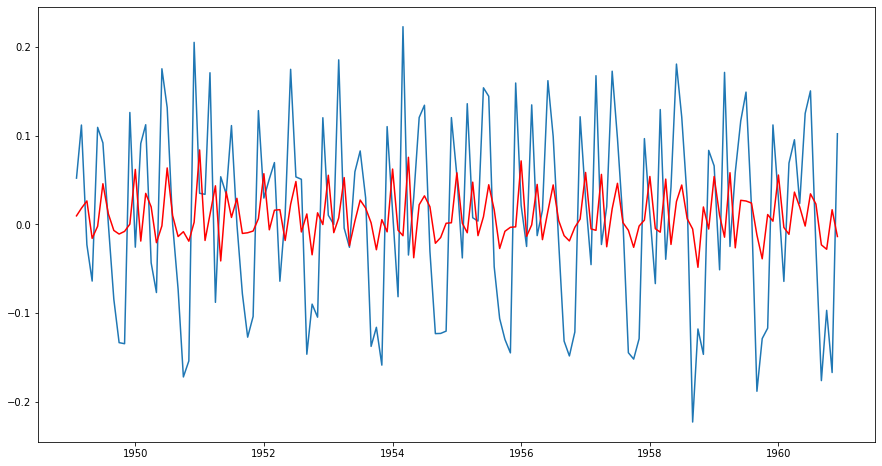

In [114]:
#AR, MA and ARIMA 
from statsmodels.tsa.arima_model import ARIMA 
# p d q
AR_model = ARIMA(df_diff, order=(2,0,0))
AR_model_results = AR_model.fit()
plt.plot(df_diff)
plt.plot(AR_model_results.fittedvalues, color='red')

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


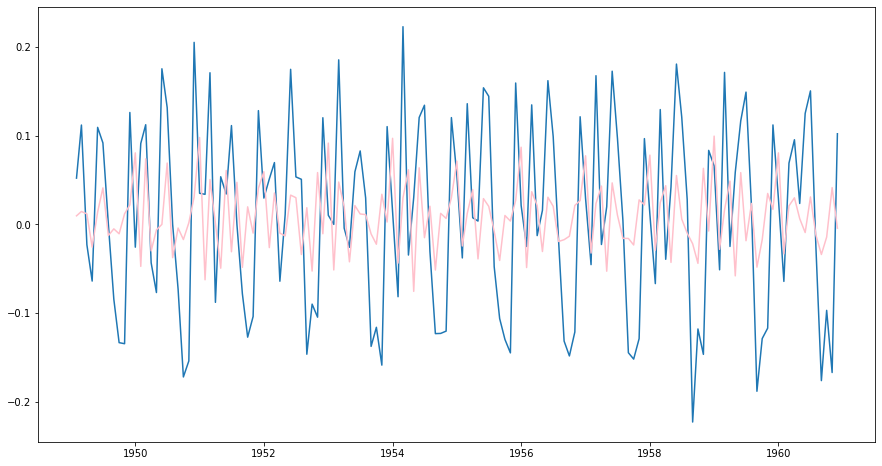

In [115]:
MA_model = ARIMA(df_diff, order=(0,0,2))
MA_Model_results = MA_model.fit()
plt.plot(df_diff)
plt.plot(MA_Model_results.fittedvalues, color='pink')

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


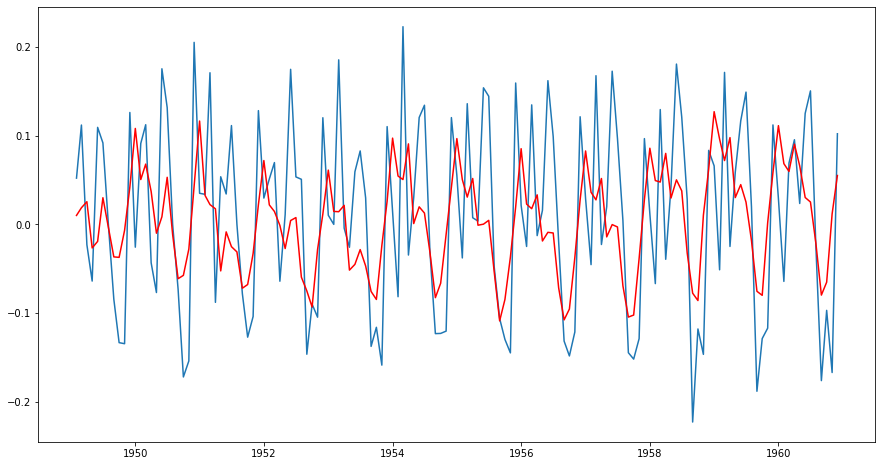

In [117]:
ARIMA_model = ARIMA(df_diff, order=(2,0,1 ))
ARIMA_results = ARIMA_model.fit()
plt.plot(df_diff)
plt.plot(ARIMA_results.fittedvalues, color='red')

**Time Series at Scale **     

**Times Series with Facebook Phophet**

In [125]:
from fbprophet import Prophet 
import pandas as pd

In [129]:
df = pd.read_csv( "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv")
df.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [131]:
df['Month'] = pd.to_datetime(df['Month'])
df

,Month,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [141]:
df = df.rename(columns={"Month":"ds", "Passengers":"y"})
df.head()
df.isnull().any()

ds    False
y     False
dtype: bool

In [142]:
model = Prophet()
model.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [144]:
# Forecasting for the next ten month
future = model.make_future_dataframe(periods=10, freq='M')
forecast = model.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1949-01-01,106.727984,54.902420,112.563107,106.727984,106.727984,-21.920631,-21.920631,-21.920631,-21.920631,-21.920631,-21.920631,0.0,0.0,0.0,84.807353
1,1949-02-01,108.901201,46.888108,105.779994,108.901201,108.901201,-30.682847,-30.682847,-30.682847,-30.682847,-30.682847,-30.682847,0.0,0.0,0.0,78.218354
2,1949-03-01,110.864107,81.871730,140.317080,110.864107,110.864107,-0.502710,-0.502710,-0.502710,-0.502710,-0.502710,-0.502710,0.0,0.0,0.0,110.361397
3,1949-04-01,113.037323,80.056117,137.240662,113.037323,113.037323,-5.185501,-5.185501,-5.185501,-5.185501,-5.185501,-5.185501,0.0,0.0,0.0,107.851823
4,1949-05-01,115.140437,81.875675,139.951392,115.140437,115.140437,-3.788702,-3.788702,-3.788702,-3.788702,-3.788702,-3.788702,0.0,0.0,0.0,111.351735


In [146]:
# select the table you want to view their values
forecast[[ 'ds' , 'yhat' , 'yhat_lower' , 'yhat_upper' , 'trend' , 'trend_lower' , 'trend_upper' ]] 

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
0,1949-01-01,84.807353,54.902420,112.563107,106.727984,106.727984,106.727984
1,1949-02-01,78.218354,46.888108,105.779994,108.901201,108.901201,108.901201
2,1949-03-01,110.361397,81.871730,140.317080,110.864107,110.864107,110.864107
3,1949-04-01,107.851823,80.056117,137.240662,113.037323,113.037323,113.037323
4,1949-05-01,111.351735,81.875675,139.951392,115.140437,115.140437,115.140437
...,...,...,...,...,...,...,...
149,1961-05-31,533.992919,504.669854,562.799263,502.558318,502.428436,502.711163
150,1961-06-30,577.062353,548.525788,606.520804,505.571811,505.385248,505.778889
151,1961-07-31,575.495626,546.770019,602.497575,508.685754,508.449122,508.959649
152,1961-08-31,529.069236,502.237757,557.586703,511.799697,511.501811,512.152472


**yhat is the prediction while yhat_lower and yhat_upper are the upper and lower boundaries**

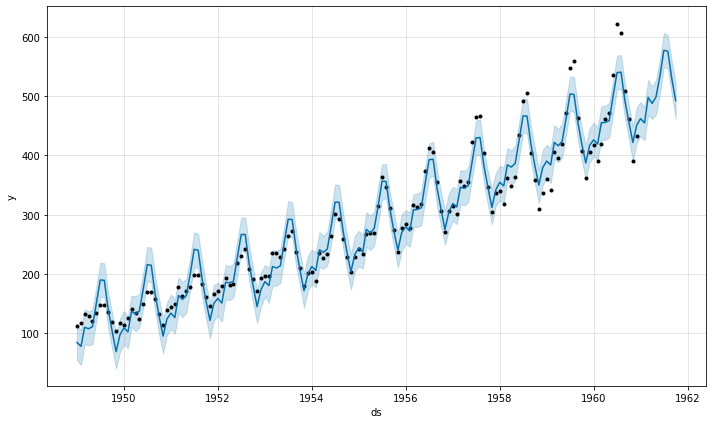

In [147]:
model.plot(forecast)
plt.show()

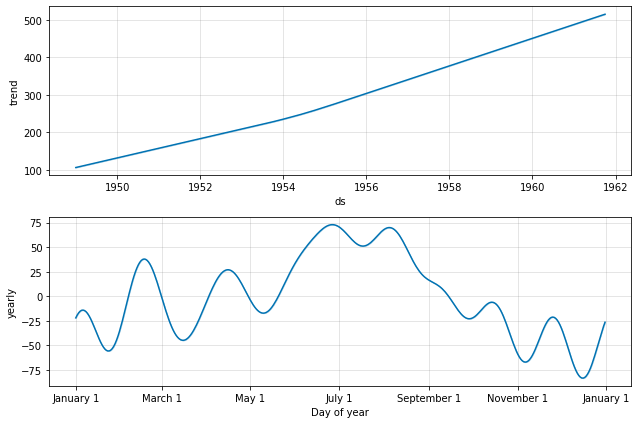

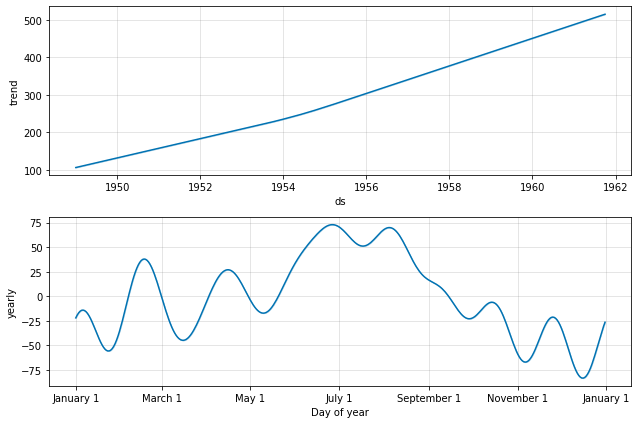

In [149]:
model.plot_components(forecast)